In [207]:
import pandas as pd
import  numpy as np
import math

train  = pd.read_csv("train.csv", encoding="big5",header=None)
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
####take out pm25
train_unmodify_pm25=[]
index = 10
mean_of_all_data=0 
mean_num=0
for i in range (12):
    train_unmodify_pm25.append([])
    for j in range (20):
        for k in range (3,27):
            train_unmodify_pm25[i].append(float(train[k][index]))
            if(float(train[k][index]) > 0 and  float(train[k][index]) < 100 ):
                mean_num+=1    
                mean_of_all_data+=int(train[k][index])
        index+=18
print(len(train_unmodify_pm25),len(train_unmodify_pm25[0]))
mean_of_all_data/=mean_num
###remove bad feat <0 or >100
###train_4 create 
train_label_4 =[]
train_feat_4 = []
data_num =9
for i in range (12):
    index=0
    for j in range (480//(data_num+1)):
        temp_mean=0
        num=0
        for k in range (data_num):
            if (train_unmodify_pm25[i][index] > 0 and train_unmodify_pm25[i][index] < 100 ) :
                temp_mean+=train_unmodify_pm25[i][index]
                num+=1
            index+=1
        if(num==0):
            temp_mean=mean_of_all_data
        else:
            temp_mean/=num
        train_feat_4.append(temp_mean)
        train_label_4.append(train_unmodify_pm25[i][index])
        index+=1
print(4,len(train_label_4),len(train_feat_4))     
                
###train_4 done 

train_modify_pm25=[]
for i in range (12):
    train_modify_pm25.append([])
    for j in range (480):
        if(train_unmodify_pm25[i][j]<0 or train_unmodify_pm25[i][j]>100):
            train_modify_pm25[i].append(mean_of_all_data)
        else:
            train_modify_pm25[i].append(train_unmodify_pm25[i][j])
######remove done
###create label and feature 
train_feat=[]
train_label=[]
for i in range (12):
    if(i ==7):
        continue
    for j in range (471):
        temp_mean=0
        for m in range (j,j+5):
            temp_mean+=train_modify_pm25[i][m]
        temp_mean/=9
        train_feat.append(temp_mean)
        train_label.append(train_modify_pm25[i][j+5])
######create train feat label done
train_feat_2 =[]
train_label_2=[]
train_label_2_true=[]

for i in range (12):
    index=9
    if(i==7):
        continue
    for j in range (48):

        train_label_2_true.append(train_modify_pm25[i][index])
        index+=10
        
for i in range (12):
    if(i==7 ):
        continue
    index=0
    for j in range (80):
        temp_mean=0
        for k in range(5):
            temp_mean+=train_modify_pm25[i][index]
            index+=1
        temp_mean/=5
        train_feat_2.append(temp_mean)
        train_label_2.append(train_modify_pm25[i][index])
        index+=1

train_feat_3 =[]
train_label_3=[]
for i in range (12):
    if(i==7 or i==8):
        continue
    index=0
    for j in range (40):
        temp_mean=0
        for k in range(9):
            temp_mean+=train_modify_pm25[i][index]
            index+=1

        temp_mean/=9
        train_feat_3.append(temp_mean)
        train_label_3.append(train_modify_pm25[i][index])
        index+=3

print(len(train_feat),len(train_label)  )



12 480
4 576 576
5181 5181


In [172]:
def gd (w,b,lr_w,lr_b):
    global tl,tf,iteration,ada
    ada+=iteration**2
    sqrt_ada =math.sqrt(ada)
    length=len(tl)*9//10
    loss_square=0
    loss=0
    w_next=0
    b_next=0
    for i in range (0,length):
        y=w*tf[i]+b
        loss+=((y-tl[i])*(y-tl[i]))
        w_next+=2*(tl[i]-y)*(-tl[i])
        b_next+=2*(tl[i]-y)*(-1)
    loss_square=math.sqrt(loss/length)
    w_next=w_next*(-1)*lr_w/sqrt_ada+w
    b_next=b_next*(-1)*lr_b/sqrt_ada+b
    lr_w/=1
    lr_b/=1
    return loss,w_next,b_next,lr_w,lr_b,loss_square

def validation (w,b):
    global tl,tf
    loss_train=0
    loss_val=0
    length=len(tl)*9//10
    num_data=len(tl)-length
    for i in range (length):
        y=w*tf[i]+b
        loss_train+=((y-tl[i])*(y-tl[i]))
    loss_train=math.sqrt(loss_train/length)
    for i in range (length,len(tl)):
        y=w*tf[i]+b
        loss_val+=((y-tl[i])*(y-tl[i]))
    loss_val=math.sqrt(loss_val/num_data)
    return loss_train,loss_val

def create_test_submission(w,b):



    test_feat= []
    test_label=[]
    test_title =[]
    row=9
    for i in range(260):
        pm25_mean=0
        for j in range(2,11):
            pm25_mean+=float(test[j][row])
            test_feat.append(pm25_mean/9)
        row+=18
    test_title.append("id")
    test_label.append("value")
    for i in range (260):
        test_title.append("id_"+str(i))
        test_label.append(test_feat[i]*w+b)

    df =pd.DataFrame(test_label,test_title)
    df.to_csv("my_submission.csv",header=False)

In [189]:

tl=train_label
tf=train_feat



1 1805
(11.621002902766786, 15.761951542552316) 1.0093955391176874 2.9106907282798433 11.621002912751676


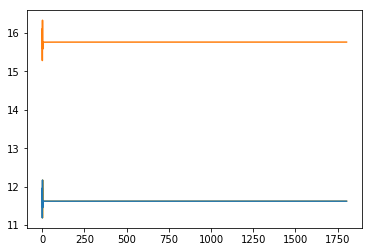

In [174]:
import matplotlib.pyplot as plt


loss_list=[]
validation_list=[]
num=len(tl)*9//10
(l,w,b,lw,lb)=(0,1, 3,1e-5,1e-5)
iteration=1
ada=0
for i in range (100000):
    if(iteration%1000==0):
        print(iteration//1000,end=" ")
    iteration+=1
    ls=0
    w_total=0
    b_total=0
    times=0
    for j in range(1):
        (l,w,b,lw,lb,loss_square)=gd(w,b,lw,lb)
        w_total+=w
        b_total+=b
        ls+=loss_square
        times+=1
    w_total/=times
    b_total/=times
    ls/=times
    w=w_total
    b=b_total
    validation_list.append(validation (w,b))
    loss_list.append(ls)
    if(iteration >10 and loss_list[len(loss_list)-2]-loss_list[len(loss_list)-1]<0.00000001):
        print(iteration)
        break
plt.plot(loss_list,color="orange")
plt.plot(validation_list)
plt.savefig('loss.jpg')
print (validation (w,b),w,b,ls)
create_test_submission(w,b)

In [185]:
from numpy.linalg import inv
def min_square_error ():
    global tl,tf
    x=tf
    x=tf[:len(x)*9//10]
    y=tl[:len(x)*9//10]
    length=(len(x)*9//10)
    cons=[]
    for i in range (length):
        cons.append(1)

    a=0    #  [ a b ]
    b=0    # [ c d ]
    c=0
    d=0
    ya=0    # [ya]
    yb=0    #[yb]
    for i in range (length):
        temp=x[i]*x[i]
        a+=temp
        temp=x[i]*cons[i]
        b+=temp
        c+=temp
        temp=cons[i]*cons[i]
        d+=temp
    for i in range (length):
        temp=y[i]*x[i]
        ya+=temp
        yb+=y[i]
    a = np.array([[a, b], [c, d]])
    ainv = inv(a)
    w=ainv[0][0]*ya+ainv[0][1]*yb
    b=ainv[1][0]*ya +ainv[1][1]*yb
    print(w,",",b)
    print(validation(w , b))

In [199]:
min_square_error()


1.6174429780060375 , 2.7021448180247205
(9.969555813437065, 12.130219203879824)


In [198]:
create_test_submission(1.6174429780060375 , 2.7021448180247205)

In [26]:
w=-10.0
b=-10.0
min_validation =15
min_w=w
min_b=b
for i in range (10000):
    if(i%10==0):
        print(i//10,end=" ")
    for j in range (10000):
        temp=validation(w,b)
        b+=0.001
        if(min_validation>temp):
            min_validation=temp
            min_w=w
            min_b=b
            print(i,j,min_validation,min_w,min_b)
        b-=10.0
    w+0.001
print(min_validation,min_w,min_b)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

KeyboardInterrupt: 

In [205]:
test[5][0]

'34'

In [220]:
train  = pd.read_csv("train.csv", encoding="big5",header=None)
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
create_csv_onlypm25 ()

In [219]:
def create_csv_onlypm25 ():
    global train
    global test
    index = 10
    pm25= []
    new_index=0
    for i in range (12):
        for j in range (20):
            pm25.append([])
            for k in range (0,27):
                pm25[new_index].append(train[k][index])
            index+=18
            new_index+=1
    df =pd.DataFrame(pm25)
    df.to_csv("trainpm25.csv",header=False)
    index = 9
    pm25= []
    new_index=0
    for i in range (12):
        for j in range (20):
            pm25.append([])
            for k in range (0,11):
                pm25[new_index].append(test[k][index])
            index+=18
            new_index+=1
    df =pd.DataFrame(pm25)
    df.to_csv("testpm25.csv",header=False)
    

In [159]:
x=0
y=0
train_feat_5 =[]
train_label_5=[]
for i in range (len(train_feat)):
    if(train_feat[i] - train_label[i] > 10 or train_feat[i] - train_label[i] < (-10)):
        x+=1
    else:
        y+=1
        train_feat_5.append(train_feat[i])
        train_label_5.append(train_label[i])
        
    
print(x,y)

2798 2383
